# **Ex3**

## Names and IDs

1.   Adi Daniel 208564682
2.   Dvir Zandany 316128529

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [1]:
import numpy as np
# load the data
import pandas as pd
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')


In [2]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score


### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

**What features are meaningful?**

Based on the provided data and the context of the correlation matrix, the features that appear to be meaningful are those with strong correlations with other features and potentially have a significant impact on the target variable (MPG). Here's a list of meaningful features: Cylinders and Displacement.
These features exhibit correlations with each other, suggesting potential relationships and dependencies. They are likely to be important when exploring and modeling the data, as they may provide insights into the factors influencing fuel efficiency (MPG) in the given dataset.

**What are the correlated features**
The features that show strong correlations with each other include Cylinders, Displacement, Horsepower, and Weight. Each of these features is significantly correlated with the others, indicating a close relationship between them  in all the possible various combinations.
There is a strong negative correlation between 'Acceleration' and 'Horsepower,' suggesting that higher horsepower is associated with lower acceleration.


In [4]:
# EDA
data = pd.concat([X, y], axis=1)
# Display basic statistics about the data
print("Data Statistics:")
print(data.describe())

Data Statistics:
        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  307.000000    288.000000  284.000000   293.000000    305.000000   
mean     5.527687    199.633681  105.109155  2975.184300     15.618689   
std      1.702089    103.550163   38.472863   842.988873      2.825252   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    105.000000   75.000000  2234.000000     13.700000   
50%      5.000000    156.000000   95.000000  2795.000000     15.500000   
75%      8.000000    302.000000  130.000000  3620.000000     17.500000   
max      8.000000    455.000000  225.000000  4997.000000     24.600000   

       Model Year         MPG  
count  311.000000  398.000000  
mean    76.122186   23.514573  
std      3.673513    7.815984  
min     70.000000    9.000000  
25%     73.000000   17.500000  
50%     76.000000   23.000000  
75%     79.000000   29.000000  
max     82.000000   46.600000  


In [5]:
# Display value ranges for each feature
print("Value Ranges:")
value_ranges = pd.DataFrame({'Min': data.min(numeric_only=True), 'Max': data.max(numeric_only=True)})
print(value_ranges)

Value Ranges:
                 Min     Max
Cylinders        3.0     8.0
Displacement    68.0   455.0
Horsepower      46.0   225.0
Weight        1613.0  4997.0
Acceleration     8.0    24.6
Model Year      70.0    82.0
MPG              9.0    46.6


In [6]:
# Number of labels
num_labels = y.shape[1]  # Assuming each column is a label
print("Number of labels:", num_labels)
# Number of features
num_features = X.shape[1]
print("Number of features:", num_features)

Number of labels: 1
Number of features: 7


In [7]:
# Unique classes in labels
unique_classes = y.nunique().values[0]
print("Unique classes in labels:",unique_classes)

Unique classes in labels: 129


In [8]:
print("Types")
print(data.dtypes)

Types
Cylinders       float64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year      float64
Origin           object
MPG             float64
dtype: object


<ipython-input-9-4ce610699f38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


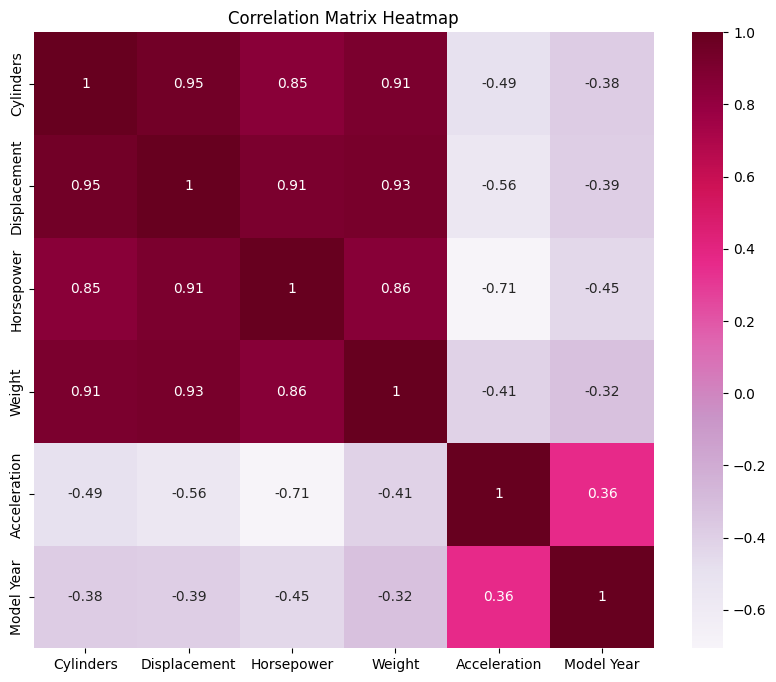

In [9]:
correlation_matrix = X.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True ,cmap='PuRd')
plt.title('Correlation Matrix Heatmap')
plt.show()


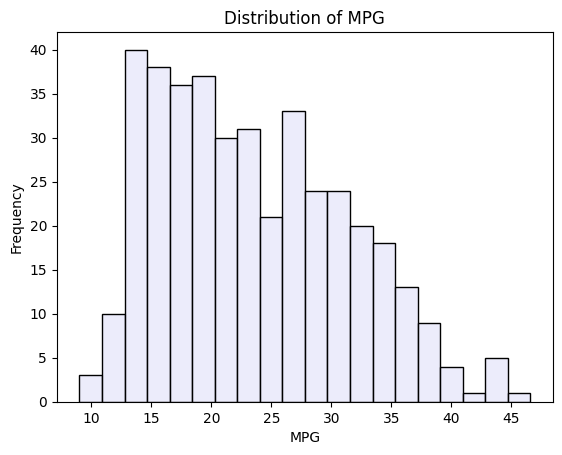

In [10]:
sns.histplot(y['MPG'], bins=20,color='lavender')
plt.title(f'Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

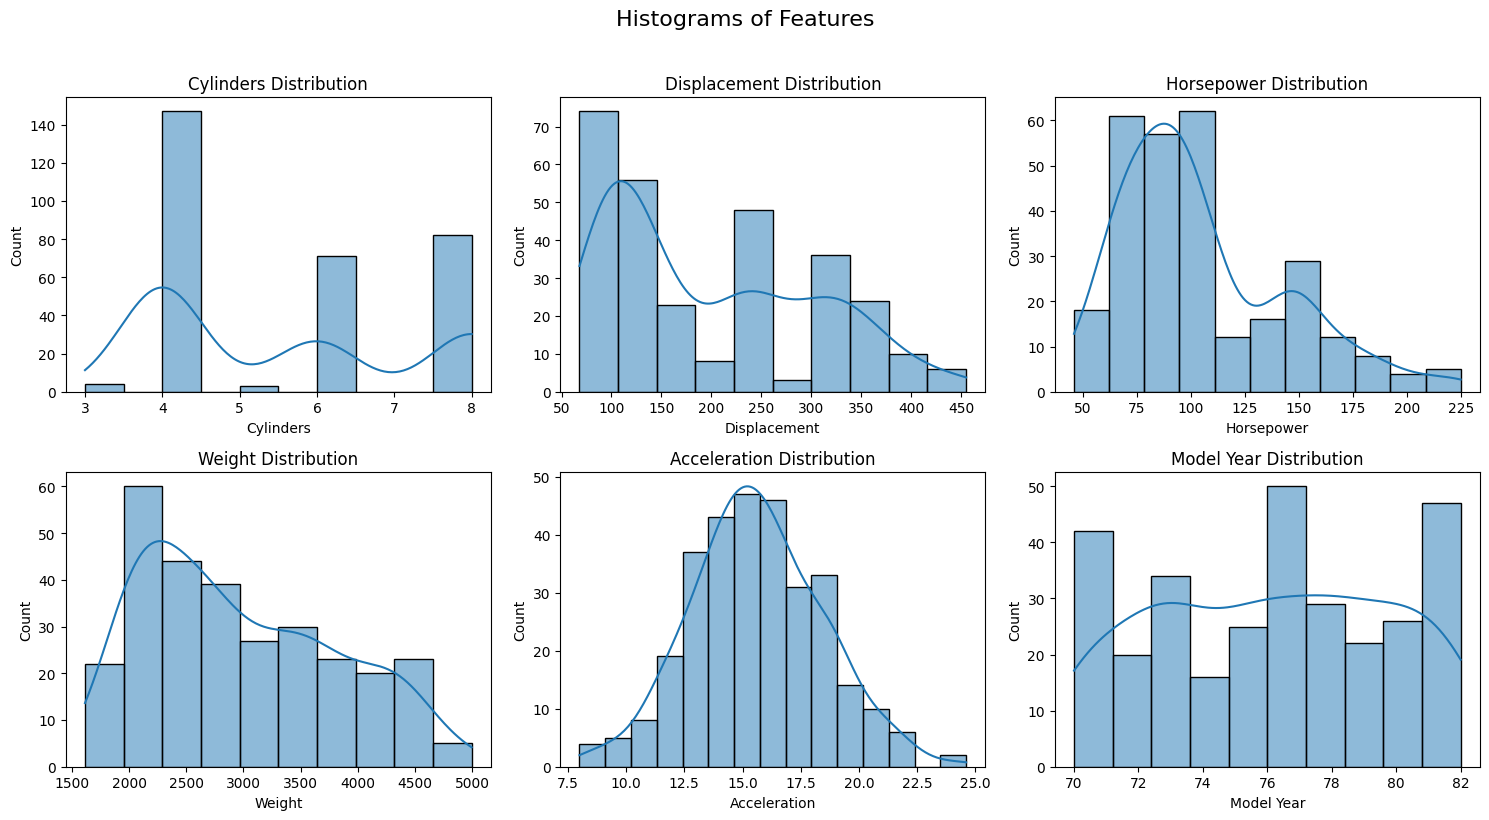

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Histograms of Features', y=1.02, size=16)

# Flatten the 2D array of subplots
axes = axes.flatten()
features=['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year']
# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(X[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### EDA insights (5pts)

What are you insgits based on the previuse visualization?

**1.**Each feature has a different range of values.
'Weight' has the highest range (1613.0 to 4997.0), indicating a significant variation in vehicle weights in the dataset.

**2.**The correlation matrix provides insights into the linear relationships between features. Strong positive correlations are observed between all the combinations of  Cylinders Displacement,Horsepower and Weight.

**3.**The distribution of 'Acceleration' resembles a Gaussian bell curve, suggesting a normal distribution with a central tendency around a specific acceleration value.


**4.**All features except 'Origin' are of type float64. 'Origin' is a categorical variable.

**5.**There is one label ('MPG') and seven features. The 'MPG' feature has 129 unique classes, indicating a diverse range of mileage values in the dataset.

### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

**Explain the reason for all methods that you apply:**

**1.**For numeric features KNN imputation is chosen to fill null values. KNN imputation is well-suited for numeric features as it considers the similarity between instances, allowing it to capture local patterns in the data. This method is advantageous for maintaining the statistical properties of the dataset and producing imputed values that align with the neighboring observations, providing a robust approach for handling missing numeric data.

**2.**For the categorical feature 'Origin', null values are filled with the mode (most frequent category). This approach is suitable for maintaining the categorical distribution and ensuring that the imputed values align with the dominant class in the 'Origin' column.


In [12]:
#------Impute missing values using K-Nearest Neighbors (KNN) for all numeric features in the dataset.--------

# Assuming 'X' is your DataFrame
features_with_nulls = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Model Year','Acceleration']
# Extract the features with null values
X_with_nulls = X[features_with_nulls]
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)
# Impute null values using KNNImputer
X_imputed = pd.DataFrame(imputer.fit_transform(X_with_nulls), columns=features_with_nulls)
# Update the original DataFrame with the imputed values
X[features_with_nulls] = X_imputed

#------Origin--------

# Assuming 'X' is your DataFrame
mode_origin = X['Origin'].mode()[0]
# Fill null values in 'Origin' with the mode
X['Origin'].fillna(mode_origin, inplace=True)

X.isna().sum()


Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [13]:
#Perform one-hot encoding on the 'Origin' column in the DataFrame
#X_encoded : pandas DataFrame A new DataFrame with binary columns representing each unique category in the 'Origin' column.
X_encoded = pd.get_dummies(X, columns=['Origin'])


In [14]:
y.isna().sum()

MPG    0
dtype: int64

In [15]:
#------Train-Test--------
# Assuming 'X' is your feature DataFrame and 'y' is your label DataFrame
# Specify the test size (e.g., 20% for testing)
test_size = 0.2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=test_size, random_state=42)


<ipython-input-16-40127b34ec41>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


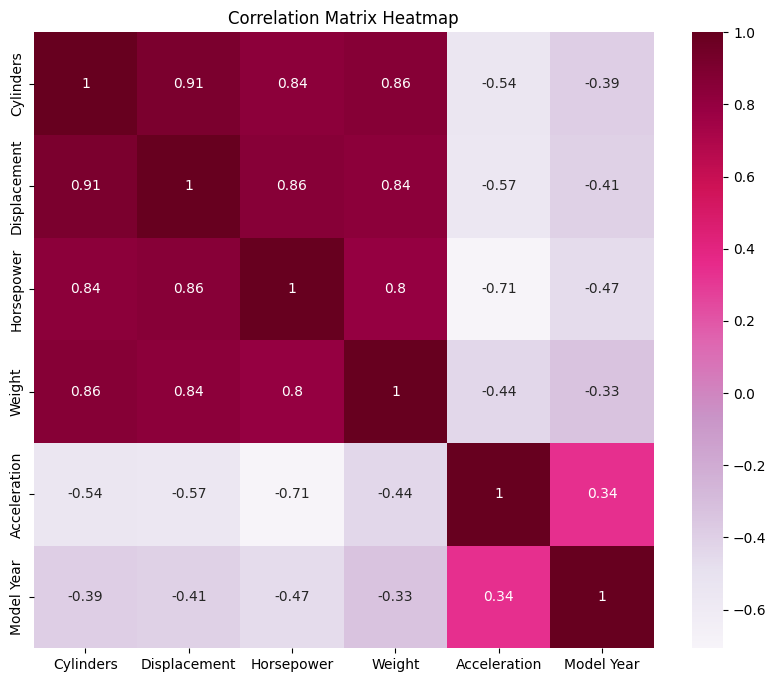

In [16]:
#------Shows-that-the-correlations-stay-the-same--------

correlation_matrix = X.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True ,cmap='PuRd')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

In [17]:
#--We-already-split-to-train-test--

# Model training
# Initialize the Decision Tree Regressor
reg_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
reg_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_tree_model.predict(X_test)

In [18]:
# Evaluation
# Evaluate the model using Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 15.261875
R-squared: 0.7161449793673587


### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)


**1.Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)**

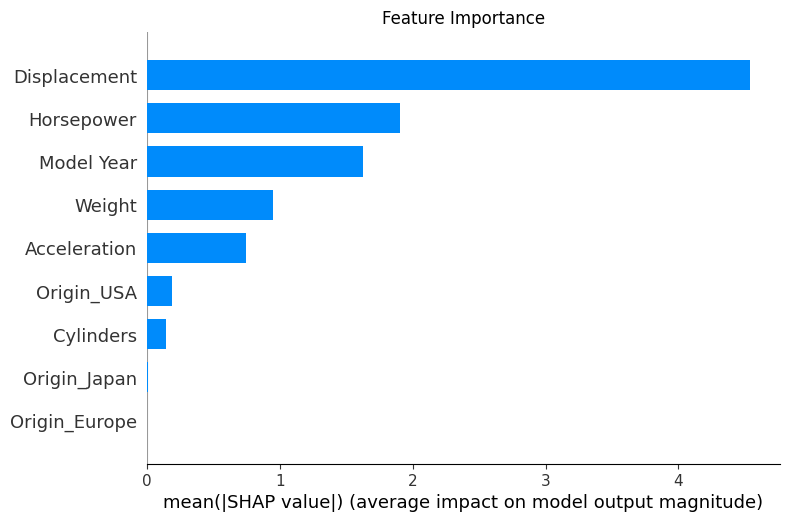

In [19]:
# Assuming 'reg_tree_model' is your trained decision tree model and 'X_train' is your training data
explainer = shap.TreeExplainer(reg_tree_model)
shap_values = explainer.shap_values(X_train)

# Create a summary plot for feature importance
shap.summary_plot(shap_values, X_train, plot_type='bar', show=False)

# Customize the plot if needed
plt.title('Feature Importance')
plt.show()


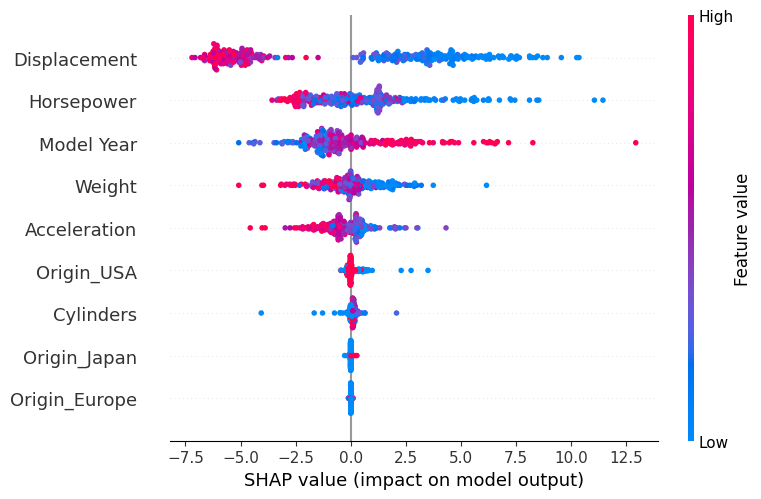

In [20]:
#Create a SHAP explainer for the trained model
explainer = shap.TreeExplainer(reg_tree_model)

#Generate SHAP values for your training data.
shap_values = explainer.shap_values(X_train)

#Create a summary plot
shap.summary_plot(shap_values, X_train)


**After analyzing the SHAP (SHapley Additive exPlanations) values for our trained decision tree model, we observe that 'displacement' is the most influential feature in determining the model's decisions. Following closely are 'horsepower' and 'model year' in terms of contribution to the model's predictions.**

**To delve deeper into the impact of these features, we have generated a SHAP** **summary plot, highlighting the magnitude and direction of their influence.**
**The summary plot provides insights into the significance of splits in the **decision tree and reveals whether the feature values push the model towards a** **positive or negative prediction.**

**2.Choose 3 different cars explain thier spesific predictions results (i,e, what was important for this spesific cars)**

Each feature's SHAP value represents its contribution to the model's prediction for the specific instance. Positive values indicate features that push the prediction higher, while negative values indicate features that push it lower. The magnitude of the SHAP value indicates the strength of the feature's influence on the prediction.

In [21]:
#----The-3-Sampels---
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(reg_tree_model.predict(X_output),2)
selected_rows = [23, 45, 68]
S = X_output.iloc[selected_rows]
S

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA,predict
238,4.0,98.0,83.0,2075.0,15.9,77.0,0,0,1,33.5
380,4.0,151.6,88.0,2160.0,14.5,82.0,0,1,0,36.0
196,4.0,98.0,60.0,2164.0,22.1,76.8,0,0,1,29.5


In [22]:
X_output = X_output.iloc[:, :-1]


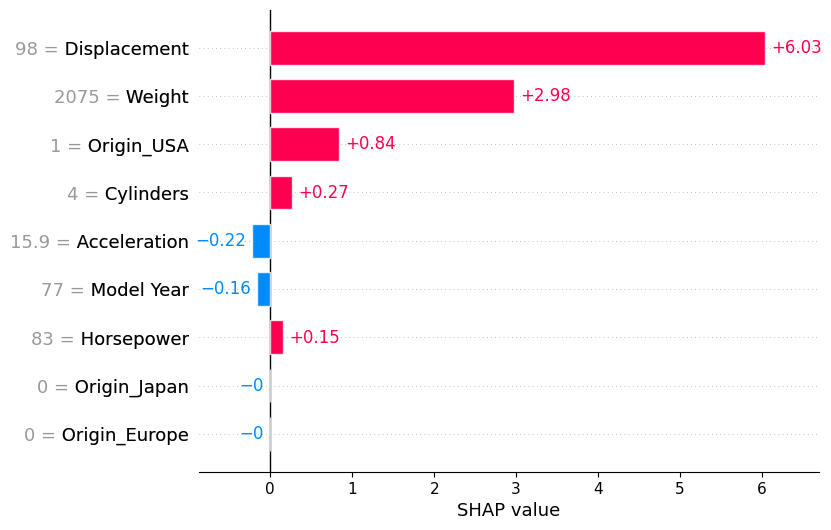

In [23]:
explainer = shap.TreeExplainer(reg_tree_model)
explanation = explainer(X_output.iloc[23])
shap.plots.bar(explanation)

**The 23rd sample in the test set shows a lower predicted output, mainly influenced by factors like acceleration and model year. Conversely, higher displacement and weight play significant roles in contributing to elevated predicted outputs.**

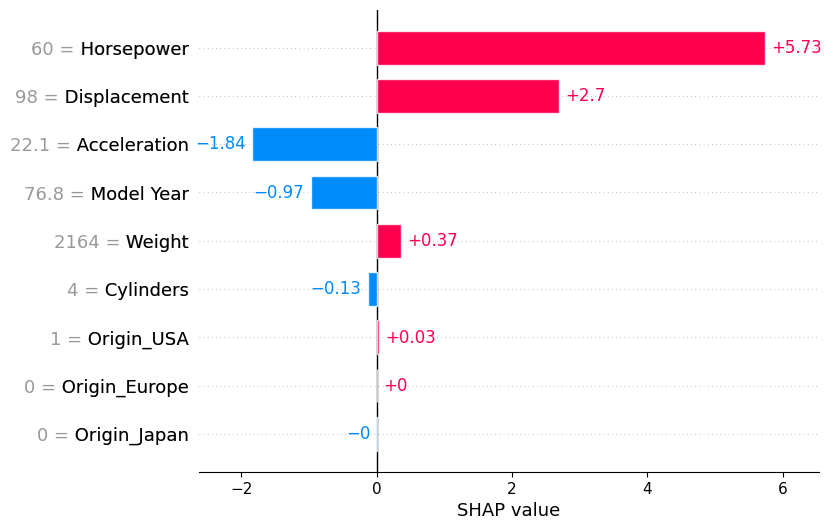

In [24]:
explainer = shap.TreeExplainer(reg_tree_model)
explanation = explainer(X_output.iloc[68])
shap.plots.bar(explanation)

**The car at index 68 is associated with lower predicted outputs, mainly influenced by factors like acceleration and model year. On the flip side, higher horsepower and displacement emerge as the most significant contributors to elevated predicted outputs.**

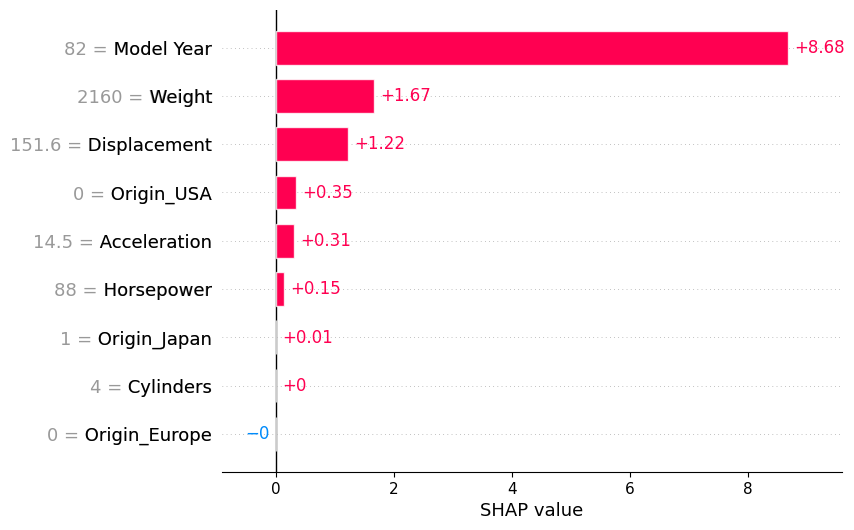

In [25]:
explainer = shap.TreeExplainer(reg_tree_model)
explanation = explainer(X_output.iloc[45])
shap.plots.bar(explanation)

**For the specific car at index 45, the SHAP values highlight that a higher Model Year, increased Weight, and greater Displacement positively contribute to the predicted output.  Importantly, there are no features that significantly contribute to negative effects, as both the number of cylinders and the origin from Europe exhibit negligible impacts.**

## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [26]:
class AdaBoost:
    def __init__(self, n_estimators=50, base_estimator=None):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.alphas = []
        self.estimators = []

    def fit(self, X, y):
        # Initialize weights for each sample
        weights = np.ones(len(X)) / len(X)

        for _ in range(self.n_estimators):
            # Create a deep copy of the base estimator
            base_estimator = self.base_estimator.__class__(**self.base_estimator.get_params())

            # Fit the base estimator with the weighted samples
            base_estimator.fit(X, y, sample_weight=weights)

            # Make predictions
            predictions = base_estimator.predict(X)

            # Calculate weighted error
            weighted_error = np.sum(weights * (predictions != y))

            # Calculate alpha (classifier weight)
            alpha = 0.5 * np.log((1 - weighted_error) / weighted_error)
            self.alphas.append(alpha)

            # Update sample weights
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)

            # Save the trained base estimator
            self.estimators.append(base_estimator)

    def predict(self, X):
        # Combine predictions from all weak classifiers using weighted sum
        predictions = np.zeros(len(X))
        for alpha, estimator in zip(self.alphas, self.estimators):
            predictions += alpha * estimator.predict(X)

        # Apply sign function to get final predictions
        return np.sign(predictions).astype(int)


### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [27]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
y[y==0]=-1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
#- Creates a Decision Tree classifier with a maximum depth of 1 and sets the random seed for reproducibility.
md1 = DecisionTreeClassifier(max_depth=1, random_state=42)
#- Creates a Decision Tree classifier with a maximum depth of 3 and sets the random seed for reproducibility.
md3 = DecisionTreeClassifier(max_depth=3, random_state=42)
#- Creates a Support Vector Machine (SVM) classifier with a linear kernel and sets the random seed for reproducibility.
SVM = svm.SVC(kernel='linear', random_state=42)
#- Defines a list of values representing the number of estimators for AdaBoost.
n_estimators_list = [3, 5, 10]
#- Initializes empty lists to store AdaBoost models with different base classifiers.
model1 =[]
model2 = []
model3 = []
for n_estimators in n_estimators_list:
    #for each model :
    #Creates an AdaBoost classifier with the specified number of estimators and uses md1 (DecisionTree with depth 1) as the base estimator.
    #Fits the AdaBoost model to the training data.
    #Appends the trained AdaBoost model with md1 to the list 'model1'
    a1 = AdaBoost(n_estimators, md1)
    a1.fit(X_train, y_train)
    model1.append(a1)
    a2 = AdaBoost(n_estimators, md3)
    a2.fit(X_train, y_train)
    model2.append(a2)
    a3 = AdaBoost(n_estimators, SVM)
    a3.fit(X_train, y_train)
    model3.append(a3)

### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

In [30]:
# The provided code evaluates and prints the accuracy and precision of three sets of AdaBoost models, each trained with different base classifiers
# (DecisionTree and SVM) and varying numbers of estimators. It iterates through the models and displays performance metrics, including accuracy and
# precision, on a test set. The loop structure allows for separate evaluation and presentation of results for each model configuration.

#---model1----
c = 0
for i in model1:
  print(f"DescisionTree with Depth 1 and numbers of {n_estimators_list[c]}")
  pred = i.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, zero_division=1)
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  c+=1



#---model2----
print("\n")
c = 0
for i in model2:
  print(f"DescisionTree with Depth 3 and numbers of {n_estimators_list[c]}")
  pred = i.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, zero_division=1)
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  c+=1


#---model3----
print("\n")
c = 0
for i in model3:
  print(f"svm.SVC with kernel='linear' and numbers of {n_estimators_list[c]}")
  pred = i.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, zero_division=1)
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  c+=1

DescisionTree with Depth 1 and numbers of 3
Accuracy: 0.7500
Precision: 0.6864
DescisionTree with Depth 1 and numbers of 5
Accuracy: 0.7500
Precision: 0.7075
DescisionTree with Depth 1 and numbers of 10
Accuracy: 0.7900
Precision: 0.7653


DescisionTree with Depth 3 and numbers of 3
Accuracy: 0.7700
Precision: 0.7857
DescisionTree with Depth 3 and numbers of 5
Accuracy: 0.8200
Precision: 0.8222
DescisionTree with Depth 3 and numbers of 10
Accuracy: 0.8700
Precision: 0.8617


svm.SVC with kernel='linear' and numbers of 3
Accuracy: 0.8300
Precision: 0.8061
svm.SVC with kernel='linear' and numbers of 5
Accuracy: 0.8300
Precision: 0.8061
svm.SVC with kernel='linear' and numbers of 10
Accuracy: 0.8250
Precision: 0.8041


### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

**Based on the provided results, DecisionTree with Depth 3 and Numbers of 10 has the highest accuracy (0.8700) and precision (0.8617). we choose Decision Tree with Depth 3.**

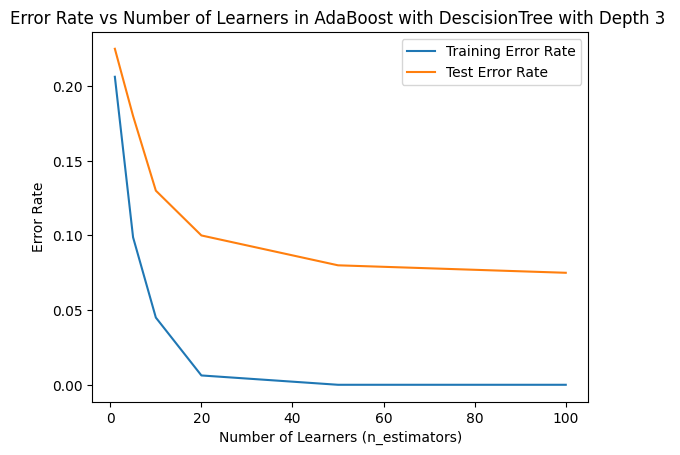

In [31]:
dt3 = DecisionTreeClassifier(max_depth=3, random_state=42)
n_estimators_list = [1,5,10,20,50,100]
train_error_rates = []
test_error_rates = []
for n_estimators in n_estimators_list:
    a3 = AdaBoost(n_estimators, dt3)
    a3.fit(X_train, y_train)
    pred = a3.predict(X_train)
    error_rate_dt3 = 1 - accuracy_score(y_train, pred)
    train_error_rates.append(error_rate_dt3)
    pred_test = a3.predict(X_test)
    error_rate_dt3_test = 1 - accuracy_score(y_test, pred_test)
    test_error_rates.append(error_rate_dt3_test)

plt.plot(n_estimators_list, train_error_rates, label='Training Error Rate')
plt.plot(n_estimators_list, test_error_rates, label='Test Error Rate')
plt.xlabel('Number of Learners (n_estimators)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Number of Learners in AdaBoost with DescisionTree with Depth 3 ')
plt.legend()
plt.show()


## 4. SVM (10 points)

Submit question 4 in the pdf file.

### Find the SVM formula (6 pts)

Given the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

### Margin size (4 pts)

Based on the hyperplane, calculate the margin size.